# Principal Component Analysis
# 主成分分析

PCA is a dimensionality reduction technique; it lets you distill multi-dimensional data down to fewer dimensions, selecting new dimensions that preserve variance in the data as best it can.

We're not talking about Star Trek stuff here; let's make it real - a black & white image for example, contains three dimensions of data: X position, Y position, and brightness at each point. Distilling that down to two dimensions can be useful for things like image compression and facial recognition, because it distills out the information that contributes most to the variance in the data set.

Let's do this with a simpler example: the Iris data set that comes with scikit-learn. It's just a small collection of data that has four dimensions of data for three different kinds of Iris flowers: The length and width of both the petals and sepals of many individual flowers from each species. Let's load it up and have a look:

PCA 是一種資料降維技術：它可以讓多維資料提煉成更少的維度，選擇新的維度，盡可能保持資料中的方差。

例如，黑白圖像包含三個維度的數據：X是寬度、Y是高度和每個點的亮度。將他壓縮成兩個維度，希望能有一種技術盡可能保留影像中的變異數。

讓我們用一個更簡單的例子來做到這一點：裡面有各種鳶尾花資料，這是一個小的資料集合，每種鳶尾花的花瓣和萼片的長度和寬度，所以這個資料是四個維度。讓我們載入它，看看：

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle

iris = load_iris()    # sklearn裡的load_iris() 可以直接載入鳶尾花資料

numSamples, numFeatures = iris.data.shape
print(numSamples)   # 資料集樣本數
print(numFeatures)  # 多少維度
print(list(iris.target_names))  # 三種品種 'setosa'山鳶尾, 'versicolor'變色鳶尾, 'virginica'維吉尼亞鳶尾

150
4
['setosa', 'versicolor', 'virginica']


So, this tells us our data set has 150 samples (individual flowers) in it. It has 4 dimensions - called features here, and three distinct Iris species that each flower is classified into.

While we can visualize 2 or even 3 dimensions of data pretty easily, visualizing 4D data isn't something our brains can do. So let's distill this down to 2 dimensions, and see how well it works:

因此，這告訴我們，我們的資料集結構有150個。它有4個維度 - 因此這裡被稱為，有150朵鳶尾花樣本資料，有四個維度。

雖然我們可以很容易的可視化 2 個甚至 3 個維度的資料，但可視化 四維資料並不是我們的大腦能夠做到的。因此，讓我們將其降為 2 個維度，並查看其工作效果如何：


將鳶尾花資料指定給一個物件X 建立一個PCA模型，設定n_components=2，將資料集從四維降低到2維。

In [2]:
X = iris.data
pca = PCA(n_components=2, whiten=True).fit(X)  # whiten=True 表示資料需要正規化
X_pca = pca.transform(X)

What we have done is distill our 4D data set down to 2D, by projecting it down to two orthogonal 4D vectors that make up the basis of our new 2D projection. We can see what those 4D vectors are, although it's not something you can really wrap your head around:

將資料集從四維降低到2維，做法是選擇兩個四維向量建立一個超平面，然後將四維資料投影到兩個維度上，輸出PCA模型的主成分看看(看看這兩個四維向量,也就是特徵向量)。

In [3]:
print(pca.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


Let's see how much information we've managed to preserve:

讓我們看看我們保存了多少資訊：因為我們無法想像四個維度，但是.explained_variance_ratio_可以知道降到二維度之後，原來資料中有多少變異數被保留下來。

In [4]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.92461872 0.05306648]
0.977685206318795


That's pretty cool. Although we have thrown away two of our four dimensions, PCA has chosen the remaining two dimensions well enough that we've captured 92% of the variance in our data in a single dimension alone! The second dimension just gives us an additional 5%; altogether we've only really lost less than 3% of the variance in our data by projecting it down to two dimensions.

As promised, now that we have a 2D representation of our data, we can plot it:


結果是一個2個項目的串列，因為我們保留了兩個維度，串列告訴我們在第一個維度上保留了來源資料92%的變異數，而第二個維度僅貢獻了5%的變異數，如果將它們加總，那麼在投影資料的兩個維度上，我們就保留了原始資料中超過97%的變異數。由此可知，要捕獲資料集中的全部資料，不一定要4個維度。

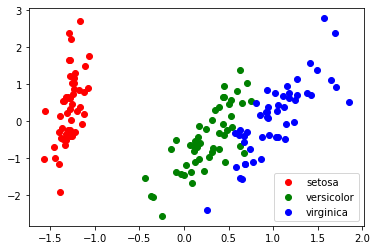

In [5]:
%matplotlib inline
from pylab import *

colors = cycle('rgb')
target_ids = range(len(iris.target_names))
pl.figure()
for i, c, label in zip(target_ids, colors, iris.target_names):
    pl.scatter(X_pca[iris.target == i, 0], X_pca[iris.target == i, 1],
        c=c, label=label)
pl.legend()
pl.show()
    

You can see the three different types of Iris are still clustered pretty well. If you think about it, this probably works well because the overall size of an individual flower probably makes both the petal and sepal sizes increase by a similar amount. Although the actual numbers on this graph have no intuitive meaning, what we're probably seeing is measure of the ratio of width to height for petals and sepals - and PCA distilled our data down to that on its own.

我們將資料降為二維，目的就是要能夠建立一張美觀的二維散佈圖，看到三種不同類型的花品種仍然聚集在相當不錯。如果你仔細想想，這可能效果很好，因為單個花的整體大小可能使花瓣和小花瓣的大小增加類似的數量。雖然此圖上的實際數字沒有直觀意義，但重要的是我們將四維資料降成二維資料，同時保留了變異數，還能清楚看到三個品種的範圍。

## Activity

Our results suggest we could actually distill this data down to a single dimension and still preserve most of its variance. Try it! Do a PCA down to one component, and measure the results.

是否可嘗試看看降成一維資料，能得到什麼樣的變異數比?

In [6]:
X = iris.data
pca = PCA(n_components=1, whiten=True).fit(X)  # whiten=True 表示資料需要正規化
X_pca = pca.transform(X)

In [7]:
print(pca.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]]


In [8]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.92461872]
0.9246187232017271


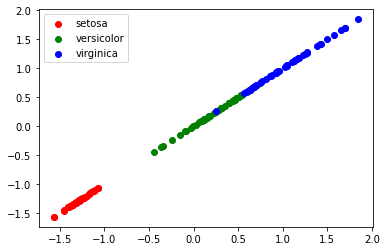

In [19]:
%matplotlib inline
from pylab import *

colors = cycle('rgb')
target_ids = range(len(iris.target_names))
pl.figure()
for i, c, label in zip(target_ids, colors, iris.target_names):
    pl.scatter(X_pca[iris.target == i, 0], X_pca[iris.target == i, 0],c=c, label=label)
pl.legend()
pl.show()